In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# READING THE FILE

In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# LOOKING FOR NULLS

In [3]:
for i in df.columns:
    null_rate = df[i].isnull().sum()/len(df)*100
    print(f"{i} - {round(null_rate,2)}%")

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 29.91%
cast - 9.37%
country - 9.44%
date_added - 0.11%
release_year - 0.0%
rating - 0.05%
duration - 0.03%
listed_in - 0.0%
description - 0.0%


# DEALING WITH MISSING DATA

In [4]:
df[['country','director','cast']] = df[['country','director','cast']].replace(np.nan,'No Data')


In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


# MOVIE AND TV SHOW DISTRIBUTION

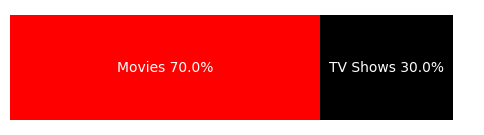

In [8]:
import matplotlib.pyplot as plt

# Example data
movie_pct =  round((df['type']=='Movie').sum()/len(df)*100,0)  # percentage of movies
tv_pct = round((df['type']=='TV Show').sum()/len(df)*100,0)     # percentage of TV shows

# Create a horizontal stacked bar
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.barh(0, movie_pct, color='red')
ax.barh(0, tv_pct, left=movie_pct, color='black')

# Remove axes
ax.axis('off')

# Add labels inside the bar
ax.text(movie_pct/2, 0, f"Movies {movie_pct}%", va='center', ha='center', color='white', fontsize=10)
ax.text(movie_pct + tv_pct/2, 0, f"TV Shows {tv_pct}%", va='center', ha='center', color='white', fontsize=10)

plt.show()


# DITRIBUTION BY COUNTRY

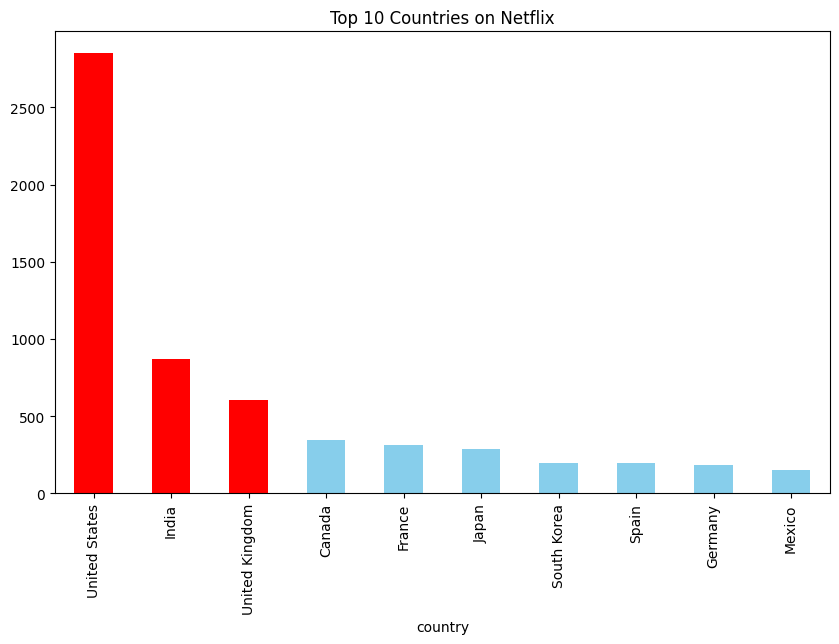

In [9]:
df_filtered = df[df['country']!='No Data']
df_filtered = df_filtered.assign(country=df_filtered['country'].str.split(',').explode('country').str.strip())
r = df_filtered.groupby('country')['type'].count().sort_values(ascending=False).head(10)
# Plot vertical bar chart
plt.figure(figsize=(10,6))
colors = ['red' if i < 3 else 'skyblue' for i in range(len(r))]
r.plot(kind='bar',color=colors)

plt.title("Top 10 Countries on Netflix")
plt.show()

# TOP 10 COUNTRIES MOVIE AND TV SHOWS SPLIT

type             Movie  TV Show   Total
country                                
United States   2043.0    807.0  2850.0
India            622.0    248.0   870.0
United Kingdom   439.0    168.0   607.0
Canada           259.0     85.0   344.0
France           230.0     85.0   315.0
Japan            202.0     84.0   286.0
South Korea      130.0     67.0   197.0
Spain            145.0     51.0   196.0
Germany          136.0     47.0   183.0
Mexico           100.0     48.0   148.0


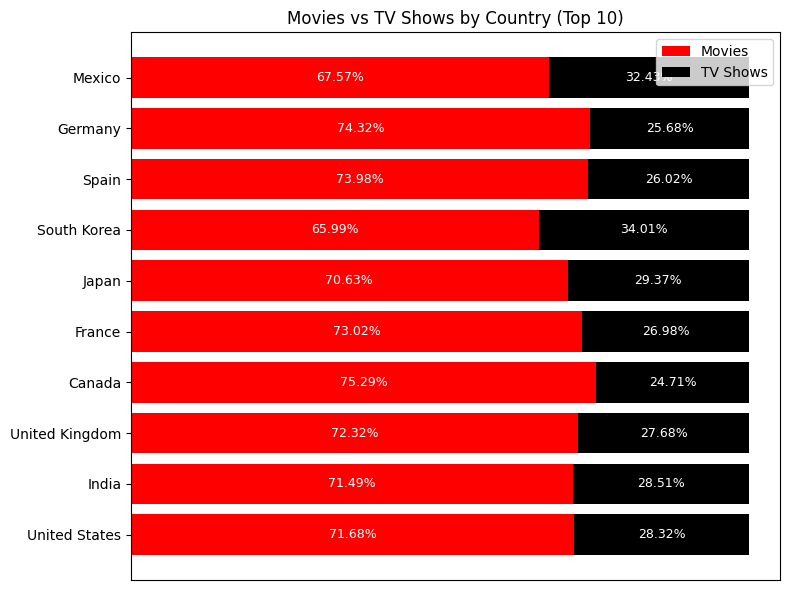

In [10]:
country_split = df_filtered.groupby(['country','type']).size().reset_index(name='count')
country_split = country_split.pivot(index='country',columns='type',values='count').fillna(0)
country_split['Total'] = country_split.sum(axis=1)
country_split = country_split.sort_values(by='Total',ascending=False)
country_split=country_split.head(10)
print(country_split)
country_split['Movies_pct'] = round(country_split['Movie'] / country_split['Total']*100,2)
country_split['TV_pct'] = round(country_split['TV Show'] / country_split['Total']*100,2)

# Plot 100% stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))

# Horizontal 100% stacked bars
ax.barh(country_split.index, country_split['Movies_pct'], color='red', label="Movies")
ax.barh(country_split.index, country_split['TV_pct'], 
        left=country_split['Movies_pct'], color='black', label="TV Shows")

# Add percentage labels inside bars
for i, (m, t) in enumerate(zip(country_split['Movies_pct'], country_split['TV_pct'])):
        ax.text(m/2, i, f"{m}%", ha="center", va="center", color="white", fontsize=9)
        ax.text(m + t/2, i, f"{t}%", ha="center", va="center", color="white", fontsize=9)

# Formatting
ax.set_title("Movies vs TV Shows by Country (Top 10)")
ax.legend()
ax.set_xticks([])
plt.tight_layout()
plt.show()

# CONTENT ADDED OVER TIME

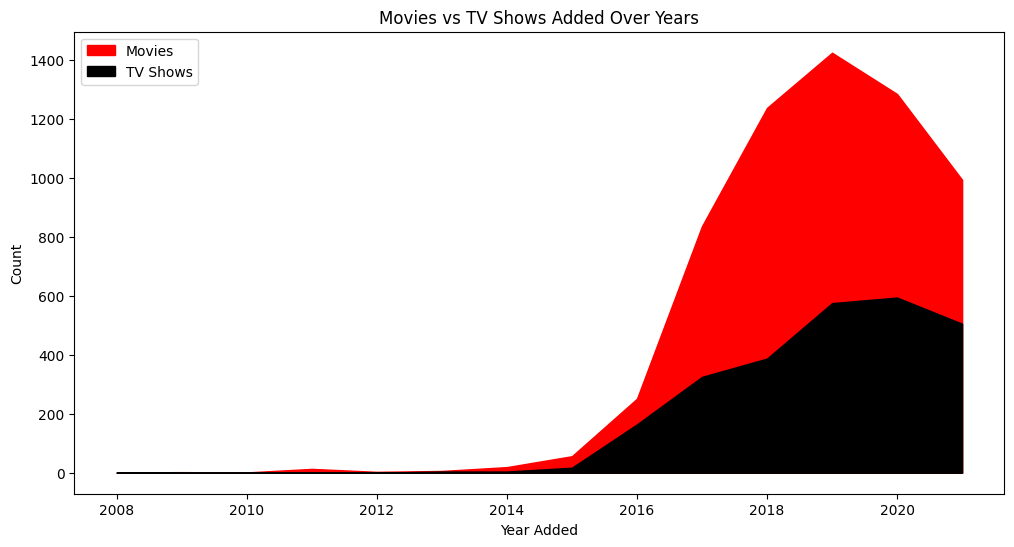

In [11]:

# Convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
df['year_added'] = df['date_added'].dt.year



df_area=df.groupby(['year_added','type']).size().reset_index(name='count')
df_area = df_area.pivot(index='year_added',columns='type',values='count').fillna(0)
df_area = df_area.sort_index()


plt.figure(figsize=(12,6))

# Plot Movies (red) from 0
plt.fill_between(df_area.index, 0, df_area['Movie'], color='red', label='Movies')

# Plot TV Shows (black) from 0
plt.fill_between(df_area.index, 0, df_area['TV Show'], color='black', label='TV Shows')

plt.xlabel("Year Added")
plt.ylabel("Count")
plt.title("Movies vs TV Shows Added Over Years")
plt.legend(loc='upper left')
plt.show()

# CONTENT ADDED BY MONTH

type         Movie  TV Show
month_added                
1.0            545      181
2.0            382      174
3.0            528      205
4.0            549      209
5.0            439      187
6.0            492      232
7.0            565      254
8.0            518      230
9.0            518      246
10.0           545      210
11.0           498      199
12.0           547      249


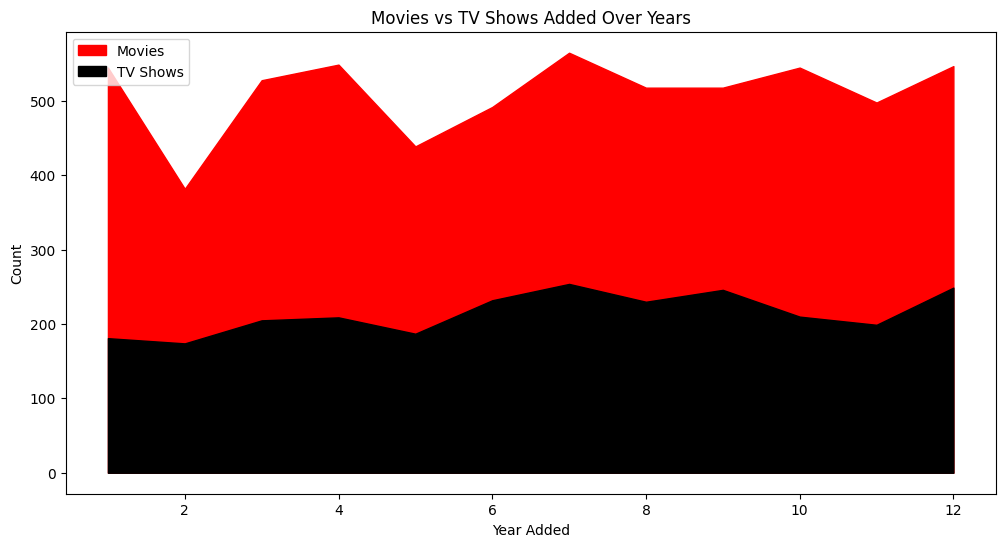

In [12]:
df['month_added'] = df['date_added'].dt.month



df_area=df.groupby(['month_added','type']).size().reset_index(name='count')
df_area = df_area.pivot(index='month_added',columns='type',values='count').fillna(0)
df_area = df_area.sort_index()

print(df_area)
plt.figure(figsize=(12,6))

# Plot Movies (red) from 0
plt.fill_between(df_area.index, 0, df_area['Movie'], color='red', label='Movies')

# Plot TV Shows (black) from 0
plt.fill_between(df_area.index, 0, df_area['TV Show'], color='black', label='TV Shows')

plt.xlabel("Year Added")
plt.ylabel("Count")
plt.title("Movies vs TV Shows Added Over Years")
plt.legend(loc='upper left')
plt.show()

# lag between when content is released and when it is added on Netflix

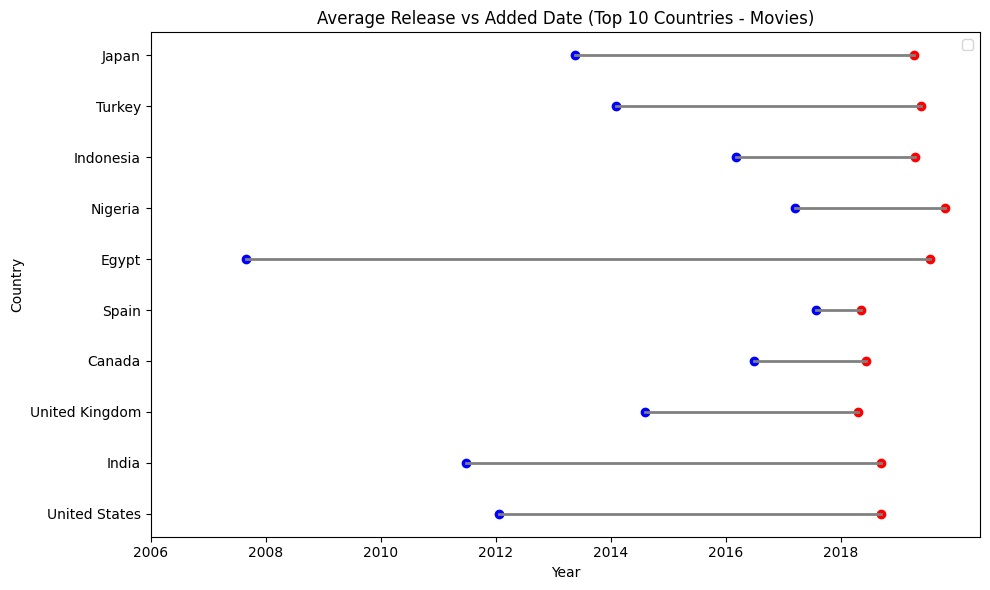

In [13]:
# Filter only movies
movies_df = df[(df['type'] == 'Movie') & (df['country'] != 'No Data')].copy()

# Ensure release_date and date_added are datetime

movies_df['date_added'] = movies_df['date_added'].dt.year


# Group by country and calculate averages
country_avg = movies_df.groupby('country').agg(
    release_year=('release_year', 'mean'),
    date_added=('date_added', 'mean'),
    count=('country', 'size')
).reset_index()

# Top 10 countries by count
top10 = country_avg.sort_values('count', ascending=False).head(10)


# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for idx, row in top10.iterrows():
    # Line between release and added
    ax.plot([row['release_year'], row['date_added']], [row['country'], row['country']], color='gray', lw=2)
    # Scatter for release year
    ax.scatter(row['release_year'], row['country'], color='blue')
    # Scatter for added date
    ax.scatter(row['date_added'], row['country'], color='red')



min_year = int(top10['release_year'].min()) - 1
max_year = int(top10['date_added'].max()) + 1

ax.set_xticks(range(min_year, max_year, 2))  


ax.set_xlabel("Year")
ax.set_ylabel("Country")
ax.set_title("Average Release vs Added Date (Top 10 Countries - Movies)")
ax.legend()
plt.tight_layout()
plt.show()


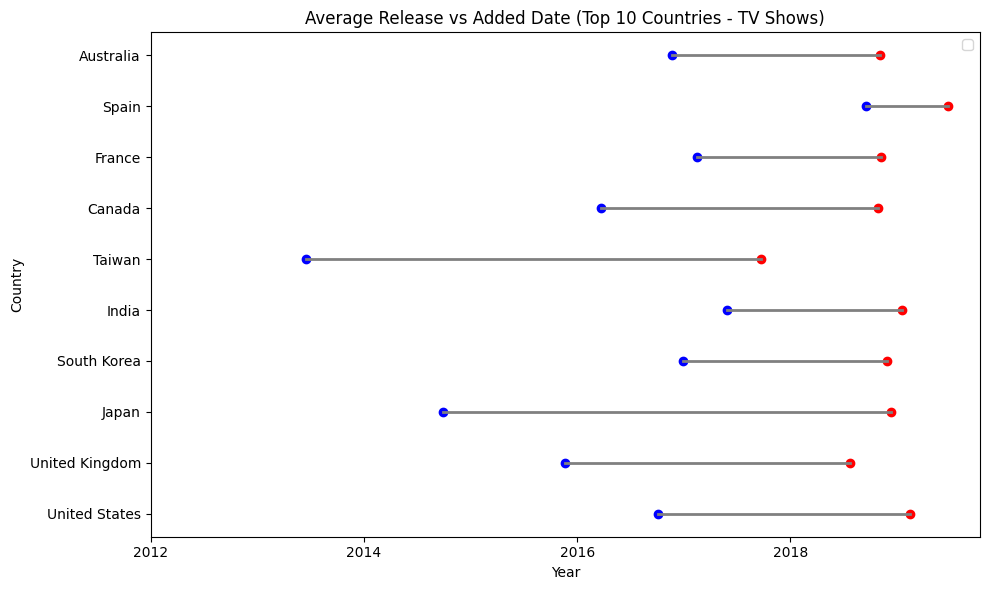

In [14]:
# Filter only movies
movies_df = df[(df['type'] == 'TV Show') & (df['country'] != 'No Data')].copy()

# Ensure release_date and date_added are datetime

movies_df['date_added'] = movies_df['date_added'].dt.year


# Group by country and calculate averages
country_avg = movies_df.groupby('country').agg(
    release_year=('release_year', 'mean'),
    date_added=('date_added', 'mean'),
    count=('country', 'size')
).reset_index()

# Top 10 countries by count
top10 = country_avg.sort_values('count', ascending=False).head(10)


# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for idx, row in top10.iterrows():
    # Line between release and added
    ax.plot([row['release_year'], row['date_added']], [row['country'], row['country']], color='gray', lw=2)
    # Scatter for release year
    ax.scatter(row['release_year'], row['country'], color='blue')
    # Scatter for added date
    ax.scatter(row['date_added'], row['country'], color='red')



min_year = int(top10['release_year'].min()) - 1
max_year = int(top10['date_added'].max()) + 1

ax.set_xticks(range(min_year, max_year, 2))  


ax.set_xlabel("Year")
ax.set_ylabel("Country")
ax.set_title("Average Release vs Added Date (Top 10 Countries - TV Shows)")
ax.legend()
plt.tight_layout()
plt.show()
